In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

---
# **Load Dataset**

In [2]:
images = []
IMG_SHAPE = None
DATA_DIR = '../data/images'


for folder in os.listdir(DATA_DIR):
    for file_name in os.listdir(os.path.join(DATA_DIR, folder)):
        image = cv2.imread(os.path.join(DATA_DIR, folder, file_name), 0)
        if IMG_SHAPE is None:
            IMG_SHAPE = image.shape
        images.append(image.flatten())
images = np.array(images)

In [3]:
print("Features in each image are:", len(images[0]))
print("Dataset size:", images.shape)

Features in each image are: 10304
Dataset size: (50, 10304)


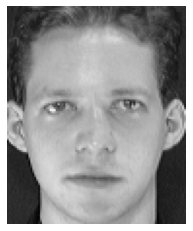

In [4]:
plt.imshow(images[0].reshape(IMG_SHAPE), cmap='gray')
plt.axis('off')
plt.show()

---
# **PCA**

In [5]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
    
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X-self.mean

        cov_mat = np.cov(X.T)

        eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

        sort_indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:,sort_indices]

        self.components = eigenvectors[:,:self.n_components]

        return
    
    def transform(self, X):
        X = X-self.mean

        return np.dot(X, self.components)
    
    def inverse_transform(self, X):
        return np.dot(X, self.components.T) + self.mean

---
# **Code Usage**

In [6]:
# Reduce dimensionality = 40 (from 10304)
pca = PCA(n_components=40)

print(images.shape)
pca.fit(images)

print(pca.components.shape)
print(pca.mean.shape)


(50, 10304)
(10304, 40)
(10304,)


In [8]:
X = images
print(X.shape)
transformed_X = pca.transform(X)
print(transformed_X.shape)

(50, 10304)
(50, 40)


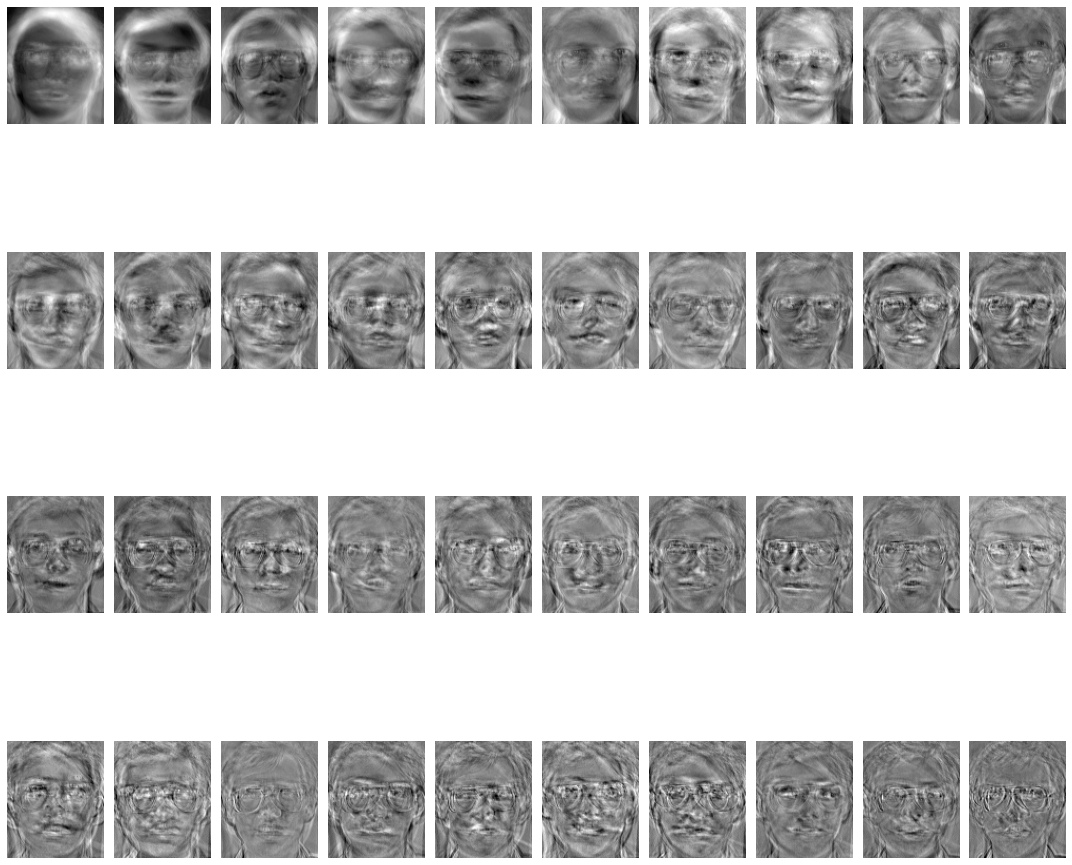

In [19]:
# Showing basis vector used to reduce the dimensionality
fig, axes = plt.subplots(4, 10, figsize = (15,15))

for ax, basis in zip(axes.flat, pca.components.T.real):
    ax.imshow(basis.reshape(IMG_SHAPE), cmap = 'gray')
    ax.axis('off')
fig.tight_layout()

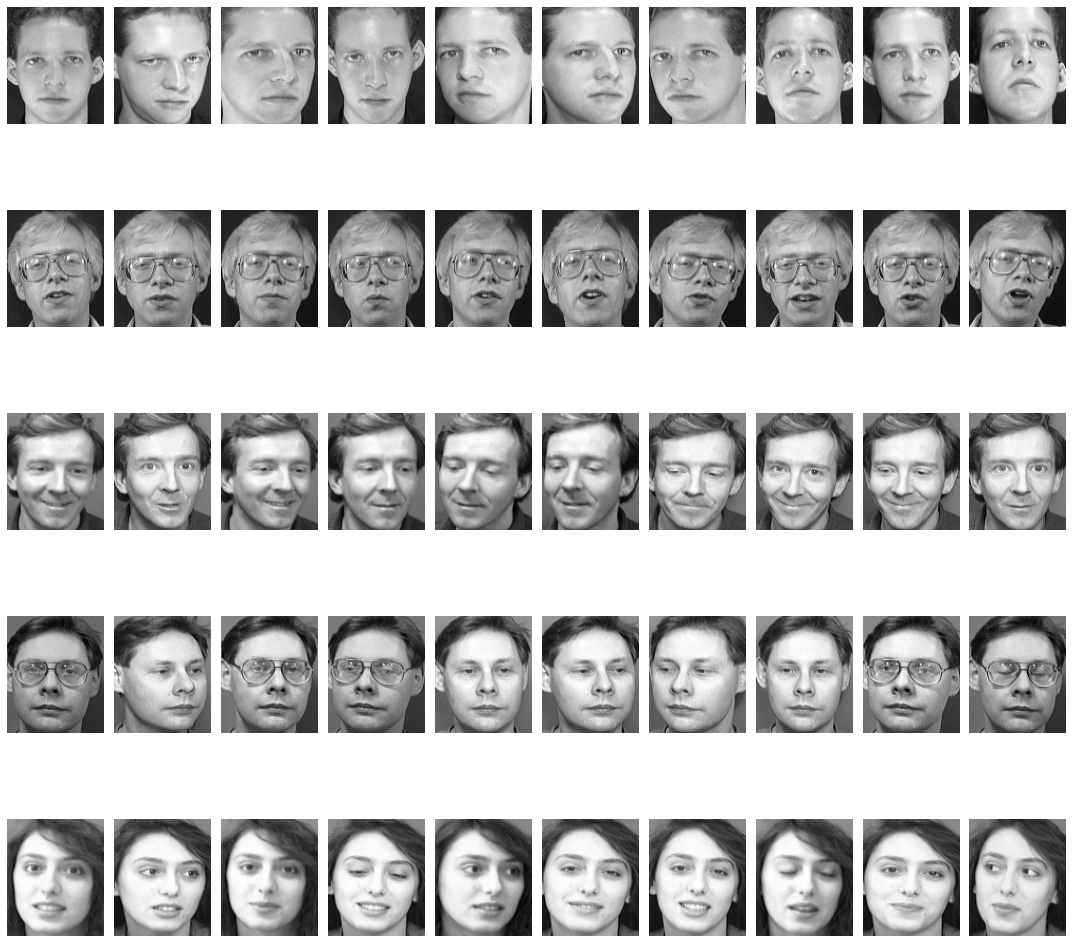

In [13]:
# Original images present in the dataset
fig, axes = plt.subplots(5, 10, figsize = (15,15))

for ax, img in zip(axes.flat, X):
    ax.imshow(img.reshape(IMG_SHAPE), cmap = 'gray')
    ax.axis('off')
fig.tight_layout()

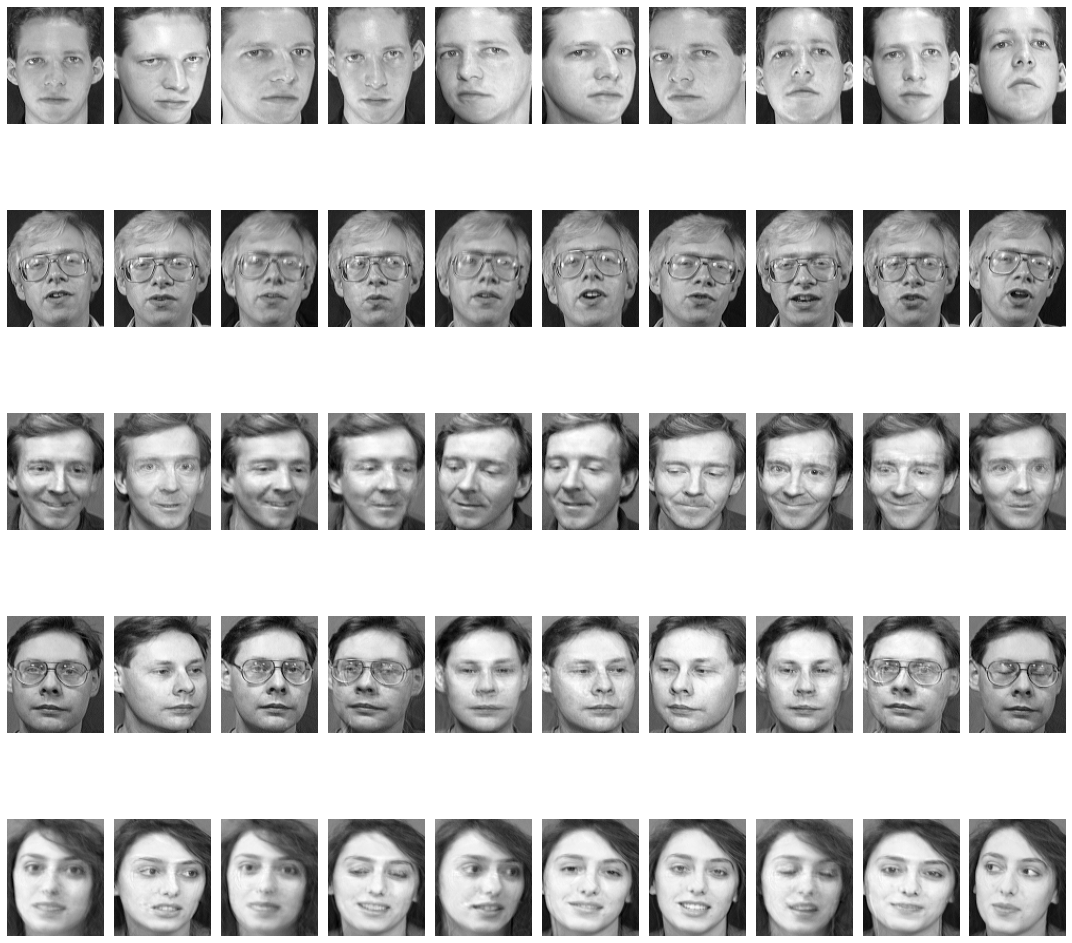

In [18]:
# Regenerated images from their reduced representations

regenerate_X = pca.inverse_transform(transformed_X)

fig, axes = plt.subplots(5, 10, figsize = (15, 15))

for ax, img in zip(axes.flat, regenerate_X.real):
    ax.imshow(img.reshape(IMG_SHAPE), cmap = 'gray')
    ax.axis('off')
fig.tight_layout()